In [5]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import inf

In [6]:
def MSE(block1, block2):
    return np.square(np.subtract(np.array(block1).astype(np.uint8), np.array(block2).astype(np.uint8))).mean()
    #return np.sum((block1.astype("float") - block2.astype("float")) ** 2) / float(block1.shape[0] * block1.shape[1])

def search(bloc1,searchBox,searchImg,bloc_width,bloc_height):
    mse = +inf
    limitX = (searchBox[1][0] - bloc_width) + 1
    limitY = (searchBox[1][1] - bloc_height)+ 1
    box2_coordinates = None

    for y in range(searchBox[0][1],limitY):
        for x in range(searchBox[0][0],limitX):
                bloc2 = searchImg[y:y+bloc_height,x:x+bloc_width]
                temp = MSE(bloc1,bloc2)
                if temp < mse:
                    mse = temp
                    box2_coordinates=[(x,y),(x+bloc_width,y+bloc_height)]
    return box2_coordinates

def spiral_search(bloc1,searchBox,searchImg,bloc_width,bloc_height):
    mse = +inf
    limitX = (searchBox[1][0] - bloc_width) + 1
    limitY = (searchBox[1][1] - bloc_height)+ 1
    box2_coordinates = None

    for y in range(searchBox[0][1],limitY):
        for x in range(searchBox[0][0],limitX):
                bloc2 = searchImg[y:y+bloc_height,x:x+bloc_width]
                temp = MSE(bloc1,bloc2)
                if temp < mse:
                    mse = temp
                    box2_coordinates=[(x,y),(x+bloc_width,y+bloc_height)]
    return box2_coordinates

def binarySearch(bloc1,searchBox,searchImg,bloc_width,bloc_height,width,height,span):
    mse = +inf
    limitX = (searchBox[1][0] - bloc_width) + 1
    limitY = (searchBox[1][1] - bloc_height)+ 1
    box2_coordinates = None


    for y in range(searchBox[0][1],limitY,bloc_height):
        for x in range(searchBox[0][0],limitX,bloc_width):
                bloc2 = searchImg[y:y+bloc_height,x:x+bloc_width]
                temp = MSE(bloc1,bloc2)
                if temp < mse:
                    mse = temp
                    box2_coordinates=[(x,y),(x+bloc_width,y+bloc_height)]
    searchBox = get_searchBox(box2_coordinates,width,height,span)
    print(searchBox,span)
    if searchBox[1][0] - searchBox[0][0] <= bloc_width or searchBox[1][1] - searchBox[0][1] <= bloc_height:
        return box2_coordinates
    else:
        return_value = binarySearch(bloc1,searchBox,searchImg,bloc_width,bloc_height,width,height,span//2)
        return return_value



def get_searchBox(coordinates,width,height,span):

    if coordinates[0][0] < span : topLeftX = 0
    else : topLeftX = coordinates[0][0] - span

    if coordinates[0][1] < span : topLeftY = 0
    else : topLeftY = coordinates[0][1] - span

    if coordinates[1][0] > width - span : bottomRightX = width
    else : bottomRightX = coordinates[1][0] + span

    if coordinates[1][1] > height - span : bottomRightY = height
    else : bottomRightY = coordinates[1][1] + span

    return [(topLeftX,topLeftY),(bottomRightX,bottomRightY)]
    

def draw_greenBox(img,coordinates):
    if coordinates is not None:
        cv2.rectangle(img, 
        (coordinates[0][0], coordinates[0][1]), 
        (coordinates[1][0], coordinates[1][1]), 
        (0 , 255, 0), 2)
    else:
        print("No coordinates")

def draw_redBox(img,coordinates):
    if coordinates is not None:
        cv2.rectangle(img, 
        (coordinates[0][0], coordinates[0][1]), 
        (coordinates[1][0], coordinates[1][1]), 
        (0, 0, 255), 2)
    else:
        print("No coordinates")

In [7]:
bloc_width,bloc_height = 8,8
seuil = 50


span = 64

image1 = "image072.png"
image2 = "image092.png"


img1 = cv2.imread(image1)
img2 = cv2.imread(image2)


Timg1 = cv2.cvtColor(img1, cv2.COLOR_BGR2YCrCb)
Yimg1 = np.array(Timg1[:,:,0]).astype(np.uint8)

Timg2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCrCb)
Yimg2 = np.array(Timg2[:,:,0]).astype(np.uint8)


width = Yimg1.shape[1]
height = Yimg1.shape[0]

print(MSE(Yimg1,Yimg2))

19.45028308256173


0.0 %
[(808, 0), (880, 40)] 32
[(824, 0), (864, 24)] 16
[(832, 0), (856, 16)] 8
[(836, 0), (852, 12)] 4
[(834, 0), (846, 10)] 2
[(833, 0), (843, 9)] 1
[(833, 0), (841, 8)] 0
[(760, 24), (832, 96)] 32
[(776, 40), (816, 80)] 16
[(784, 48), (808, 72)] 8
[(788, 52), (804, 68)] 4
[(786, 58), (798, 70)] 2
[(785, 57), (795, 67)] 1
[(785, 57), (793, 65)] 0
[(1192, 0), (1264, 40)] 32
[(1208, 0), (1248, 24)] 16
[(1216, 0), (1240, 16)] 8
[(1220, 0), (1236, 12)] 4
[(1226, 0), (1238, 10)] 2
[(1225, 0), (1235, 9)] 1
[(1225, 0), (1233, 8)] 0
[(1184, 0), (1256, 56)] 32
[(1200, 0), (1240, 40)] 16
[(1208, 8), (1232, 32)] 8
[(1212, 12), (1228, 28)] 4
[(1218, 18), (1230, 30)] 2
[(1217, 17), (1227, 27)] 1
[(1217, 17), (1225, 25)] 0
[(1216, 0), (1288, 72)] 32
[(1232, 16), (1272, 56)] 16
[(1240, 24), (1264, 48)] 8
[(1244, 28), (1260, 44)] 4
[(1250, 26), (1262, 38)] 2
[(1249, 25), (1259, 35)] 1
[(1249, 25), (1257, 33)] 0
[(1224, 0), (1296, 40)] 32
[(1240, 0), (1280, 24)] 16
[(1248, 0), (1272, 16)] 8
[(1252, 0

(-0.5, 1919.5, 1079.5, -0.5)

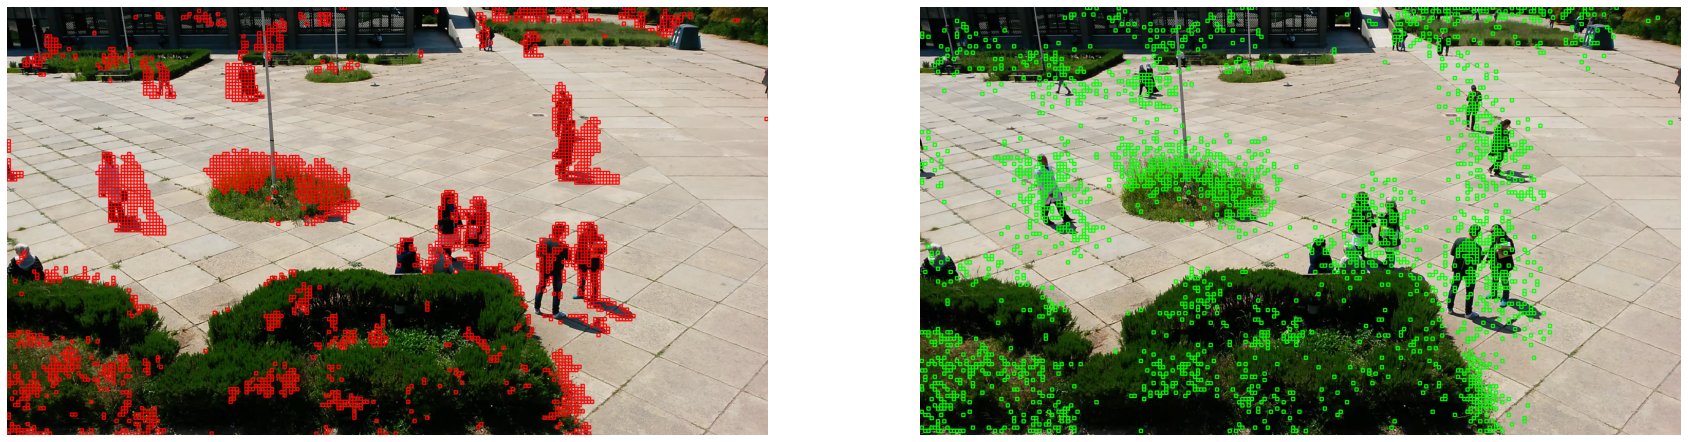

In [8]:
limitX = width - (width % bloc_height)
limitY = height- (height % bloc_height)

for y in range (0,limitY,bloc_height):
    print((y/limitY)*100,"%")
    for x in range(0,limitX,bloc_width):

        topLeftX = x
        topLeftY = y
        bottomRightX = x+bloc_width
        bottomRightY = y+bloc_height
        bloc1 = Yimg1[topLeftY:bottomRightY,topLeftX:bottomRightX]
        bloc2 = Yimg2[topLeftY:bottomRightY,topLeftX:bottomRightX]
        box2_coordinates=[(x,y),(x+bloc_width,y+bloc_height)]
        if seuil < MSE(bloc1,bloc2):
            coordinates = [(topLeftX,topLeftY),(bottomRightX,bottomRightY)]
            draw_redBox(img1,coordinates)
            searchBox = get_searchBox(coordinates,width,height,span)
            #greenBox = search(bloc1,searchBox,Yimg2,bloc_width,bloc_height)
            greenBox = binarySearch(bloc1,searchBox,Yimg2,bloc_width,bloc_height,width,height,span//2)
            draw_greenBox(img2,greenBox)
"""
x,y=100,1040
coordinates = [(x,y),(x+bloc_width,y+bloc_height)]
bloc1 = Yimg1[y:y+bloc_height,x:x+bloc_width]
draw_redBox(img1,coordinates)
searchBox = get_searchBox(coordinates,width,height,span)
draw_redBox(img2,searchBox)
draw_redBox(img1,searchBox)
greenBox = search(bloc1,searchBox,Yimg2,bloc_width,bloc_height)
#greenBox = binarySearch(bloc1,searchBox,Yimg2,bloc_width,bloc_height,width,height,span//2)
draw_greenBox(img2,greenBox)
"""
rows = 1
columns = 2

fig = plt.figure(figsize = (30,20))

fig.add_subplot(rows, columns, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis('off')

fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
